In [1]:
import numpy as np
import math

import matplotlib.pyplot as pl

Initial number of nuclei -> 100
Time constant -> 2
time step ->  0.05
total time ->  10


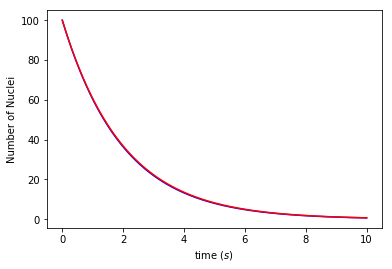

In [2]:
import matplotlib.pyplot as pl
class uranium_decay:
    """
    Simulation of radioactive decay
    Program to accompany 'Computational Physics' by Cai Hao
    """
    def __init__(self, number_of_nuclei = 100, time_constant = 2, time_of_duration = 10, time_step = 0.05,t = np.linspace(0,10,100),anality_N = np.linspace(0,10,100)):
        # unit of time is second
        self.n_uranium = [number_of_nuclei]
        self.number_of_nuclei = number_of_nuclei
        self.t = [0]
        self.tau = time_constant
        self.dt = time_step
        self.time = time_of_duration
        self.nsteps = int(time_of_duration // time_step + 1)
        self.t_0 = t
        self.anality_N = anality_N
        print("Initial number of nuclei ->", number_of_nuclei)
        print("Time constant ->", time_constant)
        print("time step -> ", time_step)
        print("total time -> ", time_of_duration)
    def calculate(self):
        for i in range(self.nsteps):
            tmp = self.n_uranium[i] - self.n_uranium[i] / self.tau * self.dt
            self.n_uranium.append(tmp)
            self.t.append(self.t[i] + self.dt)
        self.anality_N = self.number_of_nuclei*math.e**(-self.t_0/self.tau)
    def show_results(self):
        pl.plot(self.t, self.n_uranium,color = 'blue')
        pl.plot(self.t_0,self.anality_N,color = 'red')
        pl.xlabel('time ($s$)')
        pl.ylabel('Number of Nuclei')
        pl.show()
    def store_results(self):
        myfile = open('nuclei_decay_data.txt', 'w')
        for i in range(len(self.t)):
            print(self.t[i], self.n_uranium[i], file = myfile)
        myfile.close()
        
        
N_A = uranium_decay()
N_A.calculate()
N_A.show_results()
N_A.store_results()

Initial number of nuclei -> 0
Time constant -> 1
time step ->  0.05
total time ->  10


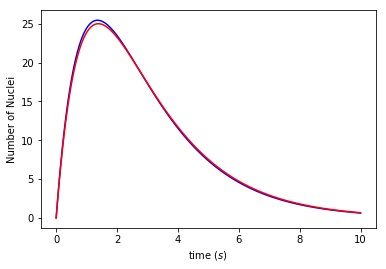

In [3]:
N_Anum = np.genfromtxt("nuclei_decay_data.txt")

class solve_N_B(uranium_decay):
    def __init__(self, number_of_nuclei = 0, time_constant = 1, time_of_duration = 10, time_step = 0.05,t = np.linspace(0,10,2010),anality_N = np.linspace(0,10,2010)):
        # unit of time is second
        self.n_uranium = [number_of_nuclei]
        self.t = [0]
        self.number_of_nuclei = number_of_nuclei
        self.tau = time_constant
        self.dt = time_step
        self.time = time_of_duration
        self.nsteps = int(time_of_duration // time_step + 1)
        self.t_0 = t
        print("Initial number of nuclei ->", number_of_nuclei)
        print("Time constant ->", time_constant)
        print("time step -> ", time_step)
        print("total time -> ", time_of_duration)
        
    def calculate(self,N_A,N_A_tau,N_A0):
        for i in range(self.nsteps):
            tmp = self.n_uranium[i] + (N_A[i,1]/N_A_tau-self.n_uranium[i]/self.tau)*self.dt
            self.n_uranium.append(tmp)
            self.t.append(self.t[i] + self.dt)
        self.anality_N = N_A0*self.tau/(N_A_tau-self.tau)*(math.e**(-self.t_0/N_A_tau)-math.e**(-self.t_0/self.tau))
    def show_results(self):
        pl.plot(self.t, self.n_uranium,color = 'blue')
        pl.plot(self.t_0,self.anality_N,color = 'red')
        pl.xlabel('time ($s$)')
        pl.ylabel('Number of Nuclei')
        pl.show()
N_B = solve_N_B()
N_B.calculate(N_Anum,2,100)
N_B.show_results()

Initial number of nuclei A-> 100
Initial number of nuclei B-> 0
Time constant A-> 4
time step ->  0.05
total time ->  20


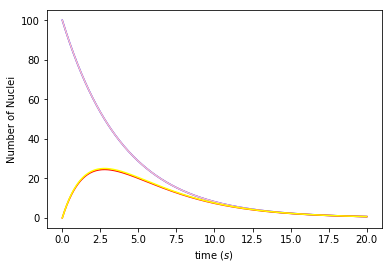

In [4]:
class solve:

    def __init__(self, number_of_nuclei_A = 100, number_of_nuclei_B = 0,time_constant_A = 4, time_constant_B = 2,time_of_duration = 20, time_step = 0.05,t_precise = np.linspace(0,20,200),N_precise_A = np.linspace(0,20,200),N_precise_B = np.linspace(0,20,200)):
        # unit of time is second
        self.n_uranium_A = [number_of_nuclei_A]
        self.n_uranium_B = [number_of_nuclei_B]
        self.number_of_nuclei_A = number_of_nuclei_A
        self.number_of_nuclei_B = number_of_nuclei_B
        self.t = [0]
        self.tau_A = time_constant_A
        self.tau_B = time_constant_B
        self.dt = time_step
        self.time = time_of_duration
        self.nsteps = int(time_of_duration // time_step + 1)
        self.t_0 = t_precise
        self.N_precise_A = N_precise_A
        self.N_precise_B = N_precise_B
        print("Initial number of nuclei A->", number_of_nuclei_A)
        print("Initial number of nuclei B->", number_of_nuclei_B)
        print("Time constant A->", time_constant_A)
        print("time step -> ", time_step)
        print("total time -> ", time_of_duration)
    def calculate(self):
        for i in range(self.nsteps):
            tmpA = self.n_uranium_A[i] - self.n_uranium_A[i] / self.tau_A * self.dt + self.n_uranium_A[i] / (2*(self.tau_A**2))*(self.dt**2)
            tmpB = self.n_uranium_B[i] + (self.n_uranium_A[i] /self.tau_A -self.n_uranium_B[i] / self.tau_B) * self.dt + 1/2*(self.n_uranium_B[i]/ (self.tau_B**2) - self.n_uranium_A[i]/(self.tau_A*self.tau_B) - self.n_uranium_A[i]/(self.tau_A))*(self.dt**2)
            self.t.append(self.t[i] + self.dt)
            self.n_uranium_A.append(tmpA)
            self.n_uranium_B.append(tmpB)
        
        self.N_precise_A = self.number_of_nuclei_A*math.e**(-self.t_0/self.tau_A)
        self.N_precise_B = self.number_of_nuclei_A * self.tau_B / (self.tau_A - self.tau_B) * (math.e ** (-self.t_0 / self.tau_A) - math.e ** (-self.t_0 / self.tau_B))

    def show_results(self):
        pl.plot(self.t, self.n_uranium_A,color = 'blue')
        pl.plot(self.t_0,self.N_precise_A,color = 'pink')
        pl.plot(self.t, self.n_uranium_B,color = 'red')
        pl.plot(self.t_0,self.N_precise_B,color = "yellow")

        pl.xlabel('time ($s$)')
        pl.ylabel('Number of Nuclei')
        pl.show()
N = solve()
N.calculate()
N.show_results()